In [3]:
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm

import enzope

In [21]:
def run_simulation(mcs=1000, r_mid=.5, f=.1, reps=10):
    gini1 = []
    gini2 = []
    for rep in tqdm(range(reps)):
        model1 = enzope.CPUModel(n_agents=500, f=f, measure_every=1)
        model2 = enzope.CPUModel(n_agents=500, f=f, measure_every=1)
        # Pongo una gaussiana cortada en 0 y 1
        model2.r = np.random.normal(r_mid, .1, size=model2.n_agents)
        model2.r = [r if r > 0 else 0 for r in model2.r]
        model2.r = [r if r < 1 else 1 for r in model2.r]
        model1.MCS(mcs)
        model2.MCS(mcs)
        gini1.append(model1.gini)
        gini2.append(model2.gini)

    mean_1 = np.mean(gini1, axis=0)
    mean_2 = np.mean(gini2, axis=0)

    std_1 = np.std(gini1, axis=0)
    std_2 = np.std(gini2, axis=0)

    return mean_1, mean_2, std_1, std_2    

In [22]:
r_mid=.4
# f=.1, el r optimo segun julian es aproximadamente .4
gini1, gini2, std1, std2 = run_simulation(mcs=30000, r_mid=r_mid, f=.1, reps=5)

100%|██████████| 5/5 [11:58<00:00, 143.62s/it]


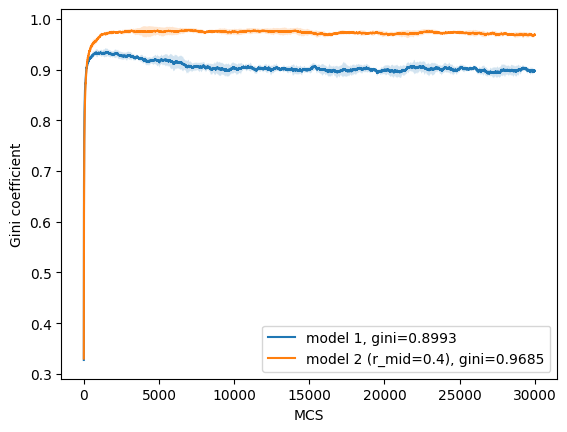

In [25]:
# plot model ginis
fig, ax = plt.subplots()
ax.plot(gini1, label=f'model 1, gini={np.mean(gini1[-1000:]):.4f}')
ax.fill_between(range(len(gini1)), gini1-std1, gini1+std1, alpha=.2)
ax.plot(gini2, label=f'model 2 (r_mid={r_mid}), gini={np.mean(gini2[-1000:]):.4f}')
ax.fill_between(range(len(gini2)), gini2-std2, gini2+std2, alpha=.2)
ax.legend()
ax.set_xlabel('MCS')
ax.set_ylabel('Gini coefficient');
# fig.savefig('figs/gini.png', dpi=300)

### En funcion del tamaño del sistema

In [4]:
sizes = [100, 300, 500, 1000, 1500, 2000]
reps = 3
fs = [0, .05, .1]
ginis = {f: [] for f in fs}

for f in tqdm(fs):
    for n_agents in sizes:
        gini = []
        for rep in range(reps):
            model = enzope.CPUModel(n_agents=n_agents, f=f, measure_every=1)
            model.MCS(10000)
            gini.append(model.gini)
        ginis[f].append(np.mean(gini, axis=0))

100%|██████████| 3/3 [31:40<00:00, 633.55s/it]


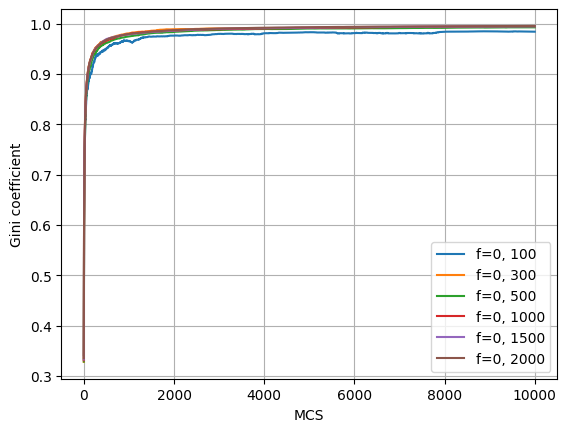

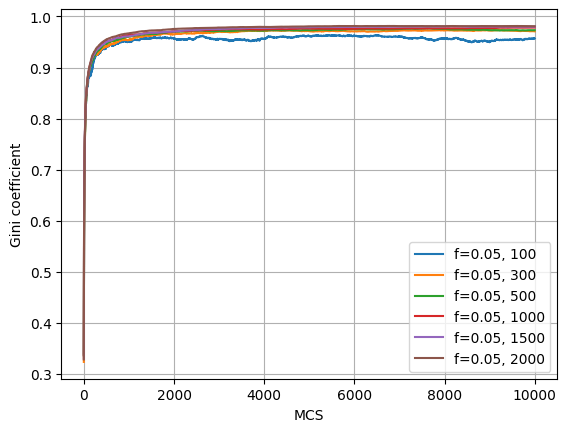

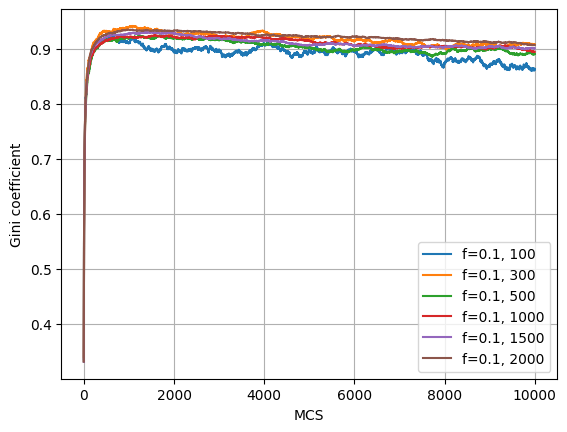

In [5]:
for f in fs:
    fig, ax = plt.subplots()
    for i, n_agents in enumerate(sizes):
        ax.plot(ginis[f][i], label=f'f={f}, {n_agents}')
    ax.legend()
    ax.set_xlabel('MCS')
    ax.grid()
    # ax.set_ylim(.7, 1)
    ax.set_ylabel('Gini coefficient');
# fig.savefig('figs/gini_n_agents.png', dpi=300)

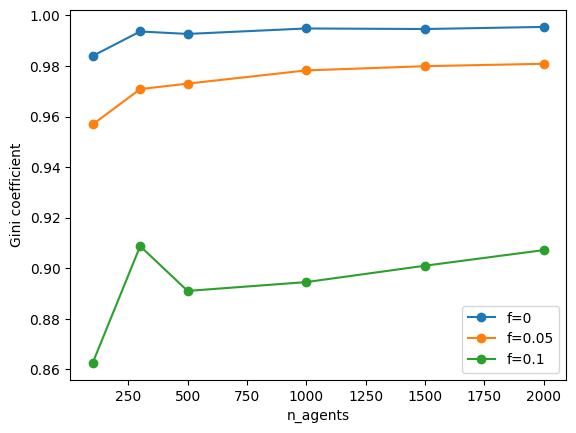

In [30]:
# plot mean of last gini value vs size for all fs
fig, ax = plt.subplots()
for f in fs:
    ax.plot(sizes, [g[-1] for g in ginis[f]], label=f'f={f}', marker='o')
ax.legend()
ax.set_xlabel('n_agents')
ax.set_ylabel('Gini coefficient');
# fig.savefig('figs/gini_n_agents_mean.png', dpi=300)